# Linear Regression 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from IPython.display import display, Math, Latex


In [6]:
data=pd.read_csv("Advertising.csv")

In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
#diffrenctiate between feature and label 
feature_list=data.columns[1:-1]
label=data.columns[-1]

In [9]:
feature_list

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [10]:
label

'Sales'

In [11]:
#data is numeric and category is not their so we don't need to use strat for spliting 
data["Sales"].value_counts

<bound method IndexOpsMixin.value_counts of 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64>

In [12]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
data1=data.copy()

In [14]:
data1["Sales"]=data1["Sales"]*100

In [15]:
data1.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,1402.250000
std,57.879185,85.854236,14.846809,21.778621,521.745657
min,1.000000,0.700000,0.000000,0.300000,160.000000
25%,50.750000,74.375000,9.975000,12.750000,1037.500000
50%,100.500000,149.750000,22.900000,25.750000,1290.000000
75%,150.250000,218.825000,36.525000,45.100000,1740.000000
max,200.000000,296.400000,49.600000,114.000000,2700.000000


In [16]:
def split_train_test(d,ratio):
    np.random.seed(42)# use for fix data choosing randomly 
    
    shuffled_indices=np.random.permutation(len(d))
    
    test_set_size=int(len(d)*ratio)
    
    test_indices=shuffled_indices[:test_set_size]
    
    train_indices=shuffled_indices[test_set_size:]
    
    return d.iloc[train_indices],d.iloc[test_indices]


In [17]:
train_set,test_set=split_train_test(data1,.2)

In [18]:
train_set

,Unnamed: 0,TV,Radio,Newspaper,Sales
79,80,116.0,7.7,23.1,1100.0
197,198,177.0,9.3,6.4,1280.0
38,39,43.1,26.7,35.1,1010.0
24,25,62.3,12.6,18.3,970.0
122,123,224.0,2.4,15.6,1160.0
...,...,...,...,...,...
106,107,25.0,11.0,29.7,720.0
14,15,204.1,32.9,46.0,1900.0
92,93,217.7,33.5,59.0,1940.0
179,180,165.6,10.0,17.6,1260.0


In [19]:
Sales_features=train_set.drop("Unnamed: 0",axis=1).drop("Sales",axis=1)
Sales_label=train_set["Sales"].copy()

In [20]:
Sales_features

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [21]:
Sales_label

79     1100.0
197    1280.0
38     1010.0
24      970.0
122    1160.0
        ...  
106     720.0
14     1900.0
92     1940.0
179    1260.0
102    1480.0
Name: Sales, Length: 160, dtype: float64

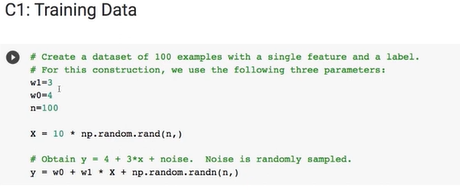

In [22]:
#part 2 for analaysis forming data for Linear regression 
np.random.seed(42)
w1=3
w0=4
n=100
X=10*np.random.randn(n,)
y=w0+w1*X+np.random.randn(n,)

In [23]:
# split data into 2 parts train using sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [24]:
x_train.shape,y_train.shape

((80,), (80,))

### data-Visualization
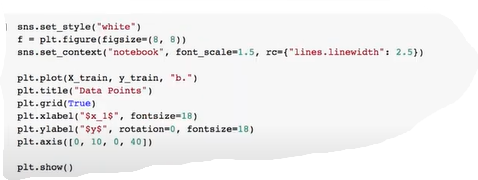


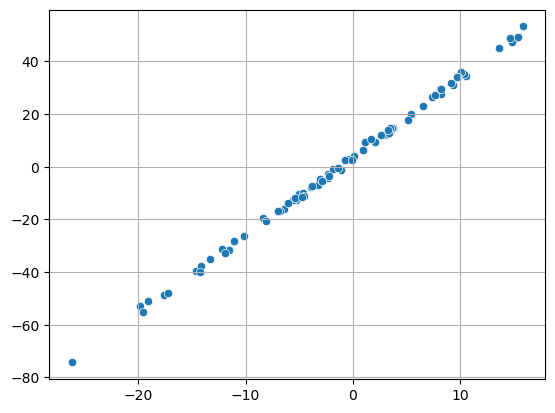

In [25]:
sns.scatterplot(x=x_train,y=y_train)
plt.grid(True)


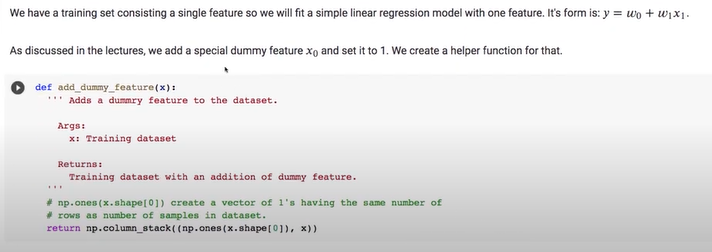

In [26]:
def add_dummy_feature(x):
    return  np.column_stack((np.ones(x.shape[0]) ,x))

In [27]:
a=add_dummy_feature(x_train)

In [28]:
a.shape

(80, 2)

In [29]:
# for sales data 
lin_Sales_feature= add_dummy_feature(Sales_features)

In [30]:
lin_Sales_feature

array([[  1. , 116. ,   7.7,  23.1],
       [  1. , 177. ,   9.3,   6.4],
       [  1. ,  43.1,  26.7,  35.1],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 224. ,   2.4,  15.6],
       [  1. ,  38.2,   3.7,  13.8],
       [  1. ,  70.6,  16. ,  40.8],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 104.6,   5.7,  34.4],
       [  1. ,  76.3,  27.5,  16. ],
       [  1. ,  78.2,  46.8,  34.5],
       [  1. , 168.4,   7.1,  12.8],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,   7.8,  38.9,  50.6],
       [  1. ,  76.4,   0.8,  14.8],
       [  1. , 129.4,   5.7,  31.3],
       [  1. ,  73.4,  17. ,  12.9],
       [  1. , 289.7,  42.3,  51.2],
       [  1. ,  19.6,  20.1,  17. ],
       [  1. , 197.6,   3.5,   5.9],
       [  1. , 284.3,  10.6,   6.4],
       [  1. , 184.9,  21. ,  22. ],
       [  1. , 112.9,  17.4,  38.6],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. , 290.7,   4.1,   8.5],
       [  1. ,  19.4,  16. ,  22.3],
       [  1. , 293.6,  27.7,   1.8],
 

In [31]:
# check for feature and weight have complitable shape and return the output 
def predict(X,w):
    if X.shape[-1]==w.shape[0]:
        return X@w

In [32]:
# Calculating loss function 
def loss(X,Y,w):
    e=predict(X,w)-Y
    loss=0.5*(np.tranpose(e)@e)
    return loss
    
    

In [33]:
# Vector equation 
#x_T@Y=X_T@Xw
# w=(x_T@Y)/(X_T@X)_1

def normal_equation(x,y):
    a=np.transpose(x)@y
    b=np.linalg.inv(np.transpose(x)@x)
    w=b@a
    return w

In [34]:
b=normal_equation(a,y_train)

In [35]:
# function given in lecture 
def normal_equation1(X, y):
    ''' Estimates parameters of the linear regression model with normal eqn.
        
        Args:
            X: Feature matrix for given inputs.
            y: Actual label vector.
        Returns:
            weight vector
    '''

    return np.linalg.pinv(X) @ y

In [36]:
# both the equations are correct 
normal_equation1(a,y_train)

array([4.01458671, 2.98585092])

In [37]:
# for sales data 
normal_equation(lin_Sales_feature,Sales_label)

array([2.97906734e+02, 4.47295175e+00, 1.89195054e+01, 2.76111434e-01])

2. Gradient descent (GD):
GD is implemented as follows:

Randomly initialize  𝐰
  to  0
 .

Iterate until convergence:

Calculate partial derivative of loss w.r.t weight vector.

Calculate new values of weights.

Update weights to new values  simultaneously
 .

We use number of epochs as a convergence criteria in this implementation.

Partial derivative of loss function :
Let's first implement a function to calculate partial derivative of loss funciton, which is obtained with the following equation.
∂∂𝐰𝐽(𝐰)=𝐗𝑇(𝐗𝐰−𝐲)
 
The multiplication of transpose of feature matrix with the difference of predicted and actual label vectors.

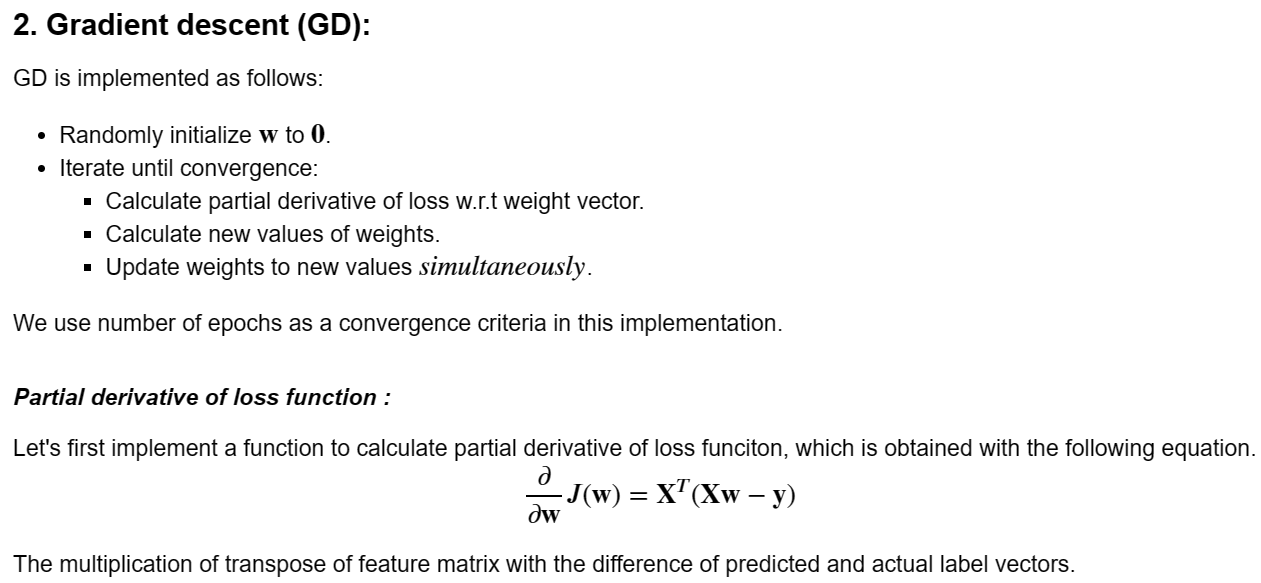

In [38]:
def gradient (x,y,w):
    return np.transpose(x)@(x@w-y)


In [39]:
gradient(a,y_train,[2,3])

array([-162.50565369,  290.07249779])

In [40]:
#w coeeficent vector
#grad=> gradient at w
#lr=> hyper parameter (learning rate)
def update_w(w,lr,grad):
    return (w-lr*grad)
    

In [41]:
# gradient desent
def loss(X,Y,w):
    e=predict(X,w)-Y
    loss=0.5*(np.tranpose(e)@e)
    return loss

def gradient (x,y,w):
    return np.transpose(x)@(x@w-y)

def update_w(w,lr,grad):
    return (w-lr*grad)
    
    

def gradient_desent(x,y,lr,num_epoch):
    w_all=[] # list to store all weighted vetor
    loss_all=[] # list to store loss
    w=np.zeroes(x.shape[1])
    
    for i in range(0, num_epoch):
        w_all.append(w)
        loss_all.append(loss(x,y,w))
        djdw=gradient(x,y,w)
        
        if i%100==0:
            print("iteratio : %d,loss:%4.2f",[i,loss_all[-1]])
            
        w=update_w(w,lr,djdw)
            
            
    return (w,loss_all,w_all)    
    

In [48]:
class LinReg(object):
    '''
    Linear regression model 
    -----------------------
    y = X@w 
    X : A feature matrix 
    w : weight vector
    y : label vector

    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100_000

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Prediction of output label for a given input.

        Args: 
        X: Feature matrix for given inputs.
        
        Returns:
        y: Output label vector as predicted by the given model

        '''
        y = X@self.w
        return y

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        ''' 
        Calculates loss for a model based on known labels:

        Args: 
        X: Feature matrix for given inputs.
        Returns:
        y: Output label vector as predicted by the given model
        
        Returns:
        y: Output label vector as predicted by the given model

        '''
        e = self.predict(X) - y

        return (1/2) * (np.transpose(e)@e)

    def rmse(self, X: np.ndarray, y: np.ndarray) -> float:

        '''
        Calculates root mean squared error of prediction w.r.t. actual label:

        Args: 
        X: Feature matrix for given inputs.
        Returns:
        y: Output label vector as predicted by the given model
        
        Returns:
        rmse 

        '''
        return np.sqrt(2/X.shape[0] * self.loss(X, y))

    def fit(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:

        '''' 
        Estimates parameters of the linear regression model with normal equation.

        Args:
        X: Feature matrix for given inputs 
        y: output label vector as predicted by the given model

        Returns:
        weight vector 

        '''
        self.w = np.linalg.pinv(X)@y

    def calculate_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        ''' 
        calculates gradients of loss function w.r.t weight vector on training set.

        Returns:
        A vector of gradient .
        '''

        return np.transpose(X)@(self.predict(X)-y)

    def update_weight(self, grad: np.ndarray, lr: float) -> np.ndarray:
        return(self.w - lr*grad)

    def learning_schedule(self, t):
        return self.t0/(t+self.t1)

    def gd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, lr: float) -> np.ndarray:
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            djdw = self.calculate_gradient(X, y)
            self.w_all.append(w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(djdw, lr)
        return self.w


        
        
